## Project:- Used car prices prediction using linear regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# importing Data

In [2]:
train_data=pd.read_csv('train-data.csv')

In [3]:
train_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
# plt.figure(figsize=(18,5))
# sns.countplot(x='Price',data=train_data)

In [5]:
train_data['Name'].unique()

array(['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option',
       'Honda Jazz V', ..., 'Volkswagen Polo IPL II 1.2 Petrol Highline',
       'Tata Bolt Revotron XT', 'Mahindra Xylo D4 BSIV'], dtype=object)

In [6]:
# sns.pairplot(df)

In [7]:
train_data.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [8]:
train_data.groupby('Price').count()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
Price,,,,,,,,,,,,,
0.44,1,1,1,1,1,1,1,1,1,1,1,1,0
0.45,3,3,3,3,3,3,3,3,3,3,3,3,0
0.50,2,2,2,2,2,2,2,2,2,2,2,2,0
0.51,1,1,1,1,1,1,1,1,1,1,1,1,0
0.53,2,2,2,2,2,2,2,2,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93.67,1,1,1,1,1,1,1,1,1,1,1,1,0
97.07,1,1,1,1,1,1,1,1,1,1,1,1,1
100.00,1,1,1,1,1,1,1,1,1,1,1,1,0


In [9]:
train_data.corr()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
Unnamed: 0,1.000000,0.002354,-0.008734,-0.010832,-0.020275
Year,0.002354,1.000000,-0.173048,0.012333,0.305327
Kilometers_Driven,-0.008734,-0.173048,1.000000,0.083113,-0.011493
Seats,-0.010832,0.012333,0.083113,1.000000,0.052225
Price,-0.020275,0.305327,-0.011493,0.052225,1.000000


<AxesSubplot:>

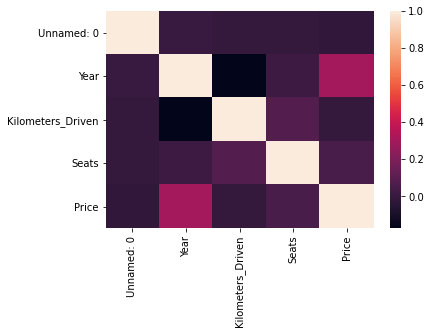

In [10]:
sns.heatmap(train_data.corr())

In [11]:
train_data.corr()['Price'].sort_values()

Unnamed: 0          -0.020275
Kilometers_Driven   -0.011493
Seats                0.052225
Year                 0.305327
Price                1.000000
Name: Price, dtype: float64

## Data Cleaning

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


First we converting object tyes into Interger values for milage,Engine and power

In [13]:
train_data

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [14]:
train_data['Mileage']

0       26.6 km/kg
1       19.67 kmpl
2        18.2 kmpl
3       20.77 kmpl
4        15.2 kmpl
           ...    
6014     28.4 kmpl
6015     24.4 kmpl
6016     14.0 kmpl
6017     18.9 kmpl
6018    25.44 kmpl
Name: Mileage, Length: 6019, dtype: object

In [15]:
train_data=train_data.iloc[:,1:]

In [16]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [17]:
train_data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [18]:
train_data.shape

(6019, 13)

In [19]:
train_data['Kilometers_Driven'].value_counts()

60000     82
45000     70
65000     68
50000     61
70000     60
          ..
58205      1
24350      1
134000     1
21363      1
30717      1
Name: Kilometers_Driven, Length: 3093, dtype: int64

In [20]:
print(train_data['Location'].unique())


['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']


In [21]:
print(train_data['Fuel_Type'].unique())

['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']


In [22]:
print(train_data['Transmission'].unique())

['Manual' 'Automatic']


In [23]:
print(train_data['Owner_Type'].unique())

['First' 'Second' 'Fourth & Above' 'Third']


In [24]:
train_data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [25]:
train_data=train_data[train_data['Mileage'].notna()]
train_data=train_data[train_data['Power'].notna()]
train_data=train_data[train_data['Engine'].notna()]

In [26]:
train_data.shape

(5981, 13)

In [27]:
train_data=train_data.reset_index(drop=True)

## Feature Engineering

In [28]:
for i in range(train_data.shape[0]):
    train_data.at[i, 'Company'] = train_data['Name'][i].split()[0]
    train_data.at[i, 'Mileage(km/kg)'] = train_data['Mileage'][i].split()[0]
    train_data.at[i, 'Engine(CC)'] = train_data['Engine'][i].split()[0]
    train_data.at[i, 'Power(bhp)'] = train_data['Power'][i].split()[0]
    
    
    

In [29]:
train_data['Mileage(km/kg)'] = train_data['Mileage(km/kg)'].astype(float)
train_data['Engine(CC)'] = train_data['Engine(CC)'].astype(float)

In [30]:
#df['Engine']=df['Engine'].apply(lambda Engine: int(Engine[:3]))

In [31]:
train_data['Power'][76]

'null bhp'

In [32]:
x = 'n'
count = 0
position = []
for i in range(train_data.shape[0]):
    if train_data['Power(bhp)'][i]=='null':
        x = 'Y'
        count = count + 1
        position.append(i)
print(x)
print(count)
print(position)

Y
107
[76, 79, 89, 120, 143, 225, 243, 260, 305, 306, 384, 422, 426, 441, 470, 573, 629, 645, 646, 736, 745, 825, 911, 922, 930, 1064, 1139, 1149, 1267, 1314, 1339, 1381, 1412, 1547, 1570, 1641, 1664, 1849, 1991, 2045, 2120, 2154, 2252, 2256, 2294, 2330, 2356, 2380, 2428, 2437, 2484, 2488, 2514, 2564, 2582, 2619, 2624, 2871, 3013, 3041, 3084, 3169, 3227, 3269, 3417, 3494, 3509, 3565, 3604, 3614, 3621, 3645, 3709, 3776, 3857, 3873, 3905, 3974, 4051, 4054, 4323, 4326, 4598, 4677, 4681, 4711, 4797, 4853, 4867, 4919, 5029, 5083, 5191, 5388, 5400, 5420, 5491, 5495, 5609, 5717, 5721, 5823, 5835, 5855, 5887, 5905, 5947]


In [33]:
train_data = train_data.drop(train_data.index[position])
train_data = train_data.reset_index(drop=True)
train_data['Power(bhp)'] = train_data['Power(bhp)'].astype(float)

In [34]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,19.67,1582.0,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,18.20,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,15.20,1968.0,140.80


In [35]:
for i in range(train_data.shape[0]):
    if pd.isnull(train_data.loc[i,'New_Price']) == False:
        train_data.at[i,'New_car_Price'] = train_data['New_Price'][i].split()[0]

In [36]:
train_data['New_car_Price']=train_data['New_car_Price'].astype(float)

Now lets deleting useless featues

In [37]:
train_data.drop(["Name"],axis=1,inplace=True)
train_data.drop(["Mileage"],axis=1,inplace=True)
train_data.drop(["Engine"],axis=1,inplace=True)
train_data.drop(["Power"],axis=1,inplace=True)
train_data.drop(["New_Price"],axis=1,inplace=True)

## Data Visualization

In [38]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5874 entries, 0 to 5873
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5874 non-null   object 
 1   Year               5874 non-null   int64  
 2   Kilometers_Driven  5874 non-null   int64  
 3   Fuel_Type          5874 non-null   object 
 4   Transmission       5874 non-null   object 
 5   Owner_Type         5874 non-null   object 
 6   Seats              5872 non-null   float64
 7   Price              5874 non-null   float64
 8   Company            5874 non-null   object 
 9   Mileage(km/kg)     5874 non-null   float64
 10  Engine(CC)         5874 non-null   float64
 11  Power(bhp)         5874 non-null   float64
 12  New_car_Price      823 non-null    float64
dtypes: float64(6), int64(2), object(5)
memory usage: 596.7+ KB


In [39]:
train_data['Price'].describe()

count    5874.000000
mean        9.601551
std        11.248283
min         0.440000
25%         3.512500
50%         5.750000
75%        10.000000
max       160.000000
Name: Price, dtype: float64

target columns

C:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 160.0)

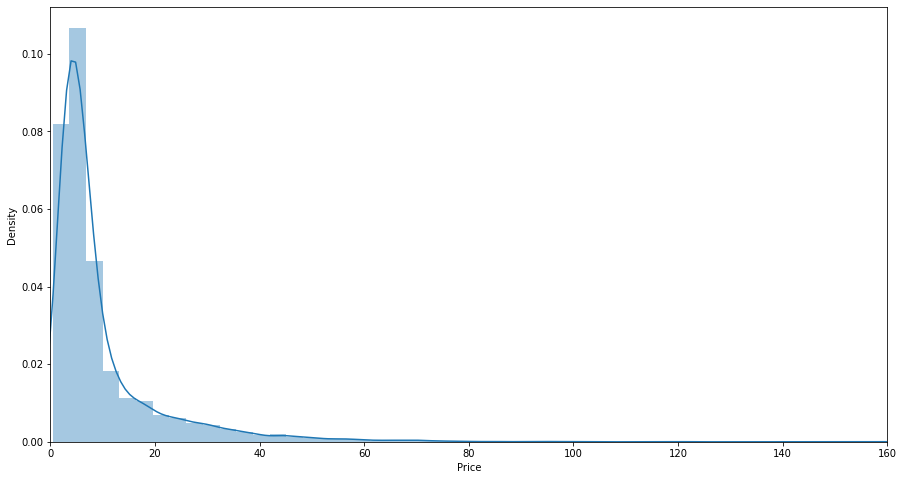

In [40]:
plt.figure(figsize=(15,8))
sns.distplot(train_data['Price'])
plt.xlim([0,160])

### Fuel Type

In [41]:
train_data['Fuel_Type'].describe()

count       5874
unique         4
top       Diesel
freq        3153
Name: Fuel_Type, dtype: object

In [42]:
train_data['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

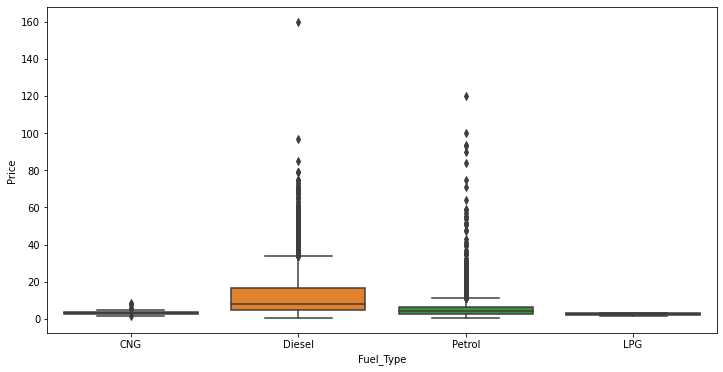

In [43]:
plt.figure(figsize=(12,6))
sns.boxplot(data=train_data,y='Price',x='Fuel_Type')

### Year

<AxesSubplot:xlabel='Year', ylabel='Price'>

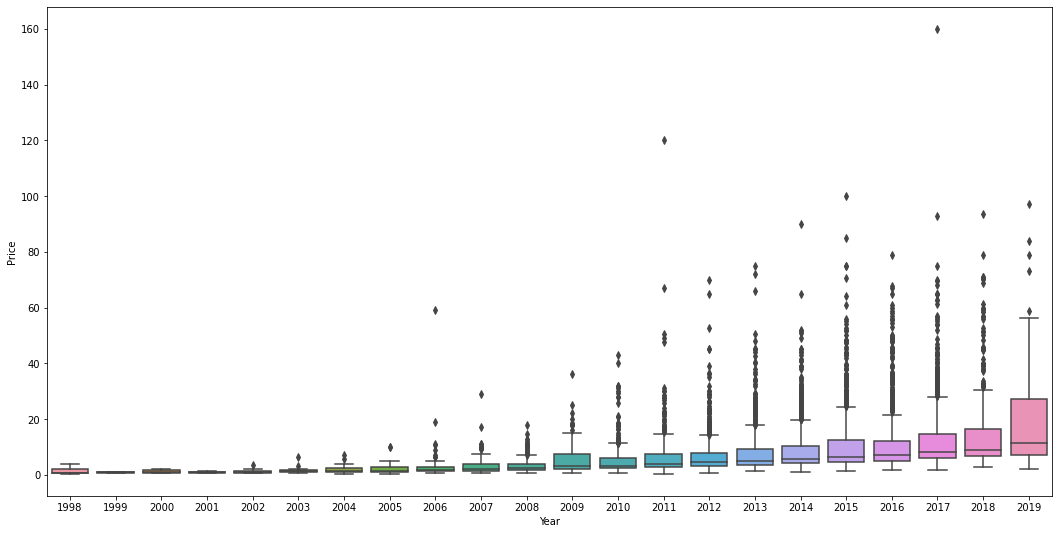

In [44]:
plt.figure(figsize=(18,9))
sns.boxplot(x='Year',y='Price',data=train_data)

#### owner type

<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

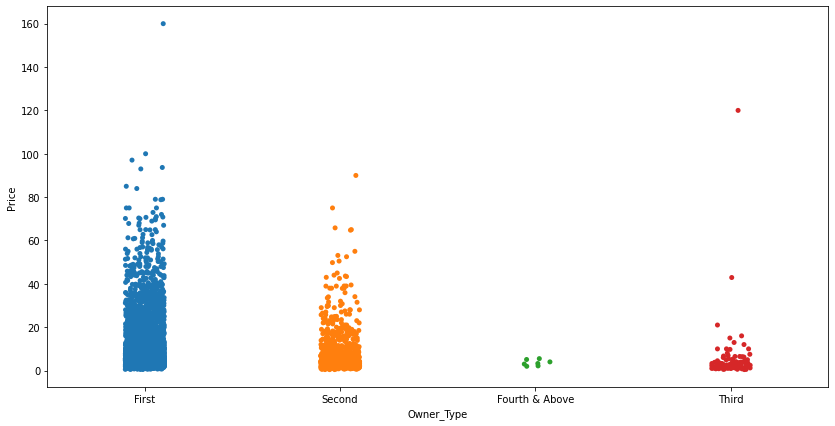

In [45]:
plt.figure(figsize=(14,7))
sns.stripplot(x='Owner_Type',y='Price',data=train_data)

#### Company

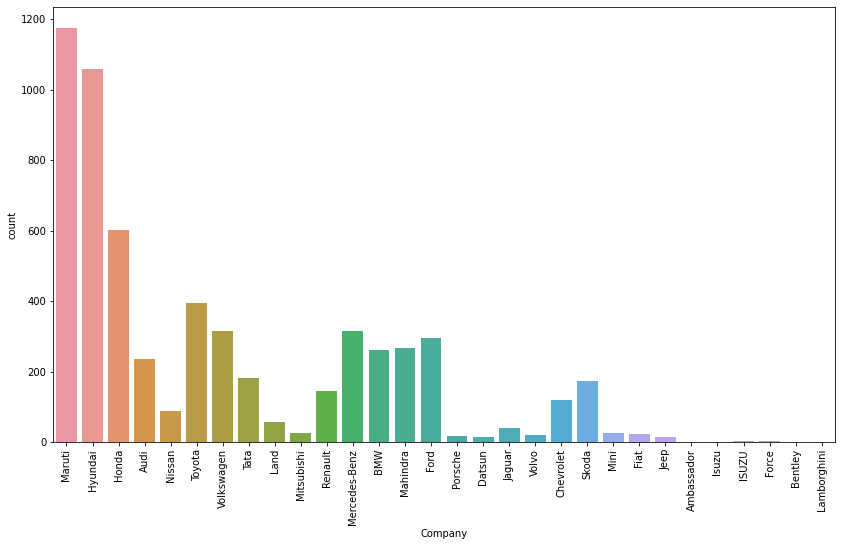

In [46]:
plt.figure(figsize=(14,8))
sns.countplot(x='Company',data=train_data)
plt.xticks(rotation=90);

# Deal with Categorical Data

As for now we have left with only 5 categorical features:
1. Location
2. Fuel_Type
3. Transmission
4. Owner_Type
5. Company

#### Location

In [47]:
train_data['Location'].value_counts()

Mumbai        775
Hyderabad     718
Kochi         645
Coimbatore    629
Pune          594
Delhi         545
Kolkata       521
Chennai       476
Jaipur        403
Bangalore     348
Ahmedabad     220
Name: Location, dtype: int64

In [48]:

# Plot Location vs Price
# sns.catplot(y='Price',x=var,data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

#### Owner type

In [49]:
var='Owner_Type'

<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

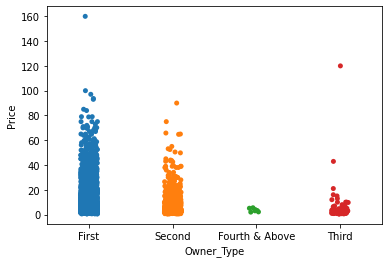

In [50]:
sns.stripplot(x=var,y='Price',data=train_data)

#### Company

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'Maruti'),
  Text(1, 0, 'Hyundai'),
  Text(2, 0, 'Honda'),
  Text(3, 0, 'Audi'),
  Text(4, 0, 'Nissan'),
  Text(5, 0, 'Toyota'),
  Text(6, 0, 'Volkswagen'),
  Text(7, 0, 'Tata'),
  Text(8, 0, 'Land'),
  Text(9, 0, 'Mitsubishi'),
  Text(10, 0, 'Renault'),
  Text(11, 0, 'Mercedes-Benz'),
  Text(12, 0, 'BMW'),
  Text(13, 0, 'Mahindra'),
  Text(14, 0, 'Ford'),
  Text(15, 0, 'Porsche'),
  Text(16, 0, 'Datsun'),
  Text(17, 0, 'Jaguar'),
  Text(18, 0, 'Volvo'),
  Text(19, 0, 'Chevrolet'),
  Text(20, 0, 'Skoda'),
  Text(21, 0, 'Mini'),
  Text(22, 0, 'Fiat'),
  Text(23, 0, 'Jeep'),
  Text(24, 0, 'Ambassador'),
  Text(25, 0, 'Isuzu'),
  Text(26, 0, 'ISUZU'),
  Text(27, 0, 'Force'),
  Text(28, 0, 'Bentley'),
  Text(29, 0, 'Lamborghini')])

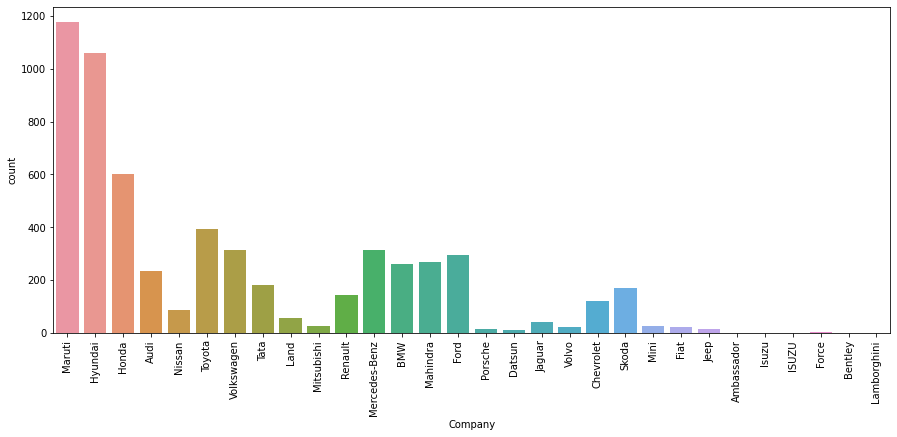

In [51]:
plt.figure(figsize=(15,6))
sns.countplot(x='Company',data=train_data)
plt.xticks(rotation=90)

## Feature Engineering 

In [52]:
var='Location'

In [53]:
train_data[var].value_counts()

Mumbai        775
Hyderabad     718
Kochi         645
Coimbatore    629
Pune          594
Delhi         545
Kolkata       521
Chennai       476
Jaipur        403
Bangalore     348
Ahmedabad     220
Name: Location, dtype: int64

One-hot-encoding

In [54]:
location=train_data['Location']

In [55]:
location=pd.get_dummies(location,drop_first=True)

In [56]:
location.head()

,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


#### Working fuel time

In [57]:
train_data['Fuel_Type'].value_counts()

Diesel    3153
Petrol    2656
CNG         55
LPG         10
Name: Fuel_Type, dtype: int64

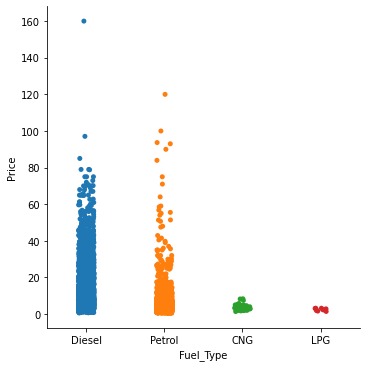

In [58]:
sns.catplot(x='Fuel_Type',y='Price',data=train_data.sort_values('Price',ascending=False))

In [59]:
Fuel_t=train_data['Fuel_Type']
Fuel_t=pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

,Diesel,LPG,Petrol
0,0,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


#### owner type

In [60]:
train_data['Owner_Type'].value_counts()

First             4840
Second             926
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64

In [61]:
train_data.replace({"First":1,'Second':2,'Third':3, 'Fourth & Above':4},inplace=True)

#### Transmission

In [62]:
train_data['Transmission'].value_counts()

Manual       4172
Automatic    1702
Name: Transmission, dtype: int64

<AxesSubplot:xlabel='Transmission', ylabel='Price'>

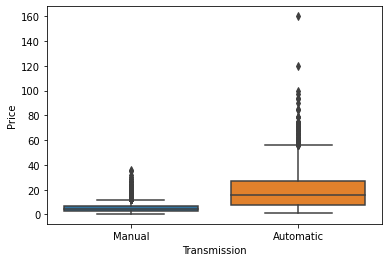

In [63]:
sns.boxplot(x='Transmission',y='Price',data=train_data.sort_values('Price',ascending=True))

In [64]:
Transmission=train_data['Transmission']
Transmission=pd.get_dummies(Transmission,drop_first=True)

In [65]:
Transmission.head()

,Manual
0,1
1,1
2,1
3,1
4,0


#### Company

In [66]:
train_data['Company'].value_counts()

Maruti           1175
Hyundai          1058
Honda             601
Toyota            394
Mercedes-Benz     316
Volkswagen        314
Ford              295
Mahindra          268
BMW               262
Audi              235
Tata              183
Skoda             172
Renault           145
Chevrolet         120
Nissan             89
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               23
Volvo              21
Porsche            16
Jeep               15
Datsun             13
Force               3
ISUZU               2
Lamborghini         1
Ambassador          1
Bentley             1
Isuzu               1
Name: Company, dtype: int64

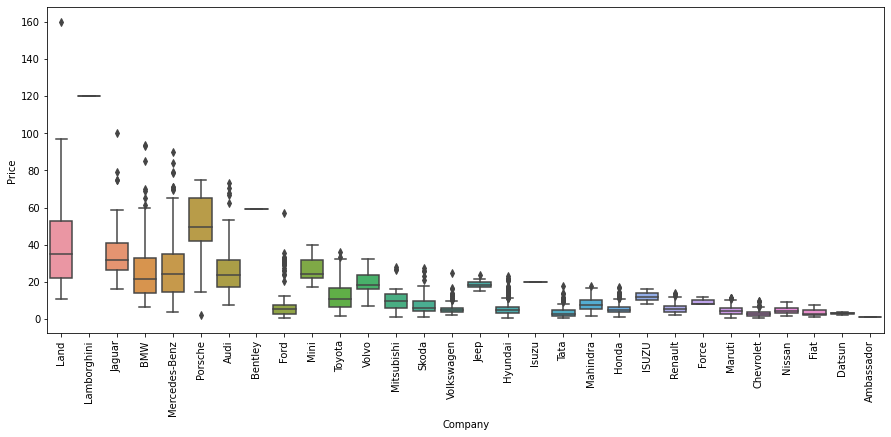

In [67]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Company',y='Price',data=train_data.sort_values('Price',ascending=False))
plt.xticks(rotation=90);

lots of variation so we drop them

In [68]:
#train_data=train_data.drop(['Company'],axis=1,inplace=True)

In [69]:
final_train=pd.concat([train_data,location,Fuel_t,Transmission],axis=1)

In [70]:
final_train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),...,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Diesel,LPG,Petrol,Manual
0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,Maruti,26.60,...,0,0,0,0,1,0,0,0,0,1
1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,Hyundai,19.67,...,0,0,0,0,0,1,1,0,0,1
2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,Honda,18.20,...,0,0,0,0,0,0,0,0,1,1
3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,Maruti,20.77,...,0,0,0,0,0,0,1,0,0,1
4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,Audi,15.20,...,0,0,0,0,0,0,1,0,0,0


In [71]:
#final_train=final_train.drop(['Location','Fuel_Type','Transmission','New_car_Price'],axis=1)

In [72]:
final_train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),...,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Diesel,LPG,Petrol,Manual
0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,Maruti,26.60,...,0,0,0,0,1,0,0,0,0,1
1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,Hyundai,19.67,...,0,0,0,0,0,1,1,0,0,1
2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,Honda,18.20,...,0,0,0,0,0,0,0,0,1,1
3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,Maruti,20.77,...,0,0,0,0,0,0,1,0,0,1
4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,Audi,15.20,...,0,0,0,0,0,0,1,0,0,0


In [73]:
final_train.shape

(5874, 27)

## now deal with test data

In [74]:
test_data=pd.read_csv('test-data.csv')

In [75]:
test_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [76]:
test_data=test_data.iloc[:,1:]

In [77]:
test_data=test_data[test_data['Mileage'].notna()]

In [78]:
test_data=test_data[test_data['Engine'].notna()]

In [79]:
test_data=test_data[test_data['Power'].notna()]

In [80]:
test_data=test_data[test_data['Seats'].notna()]

In [81]:
test_data=test_data.reset_index(drop=True)

In [82]:
#test_data.head()

In [83]:
for i in range(test_data.shape[0]):
    test_data.at[i,'Mileage(km/kg)']=test_data['Mileage'][i].split()[0]
    test_data.at[i, 'Engine(CC)']=test_data['Engine'][i].split()[0]
    test_data.at[i, 'Power(bhp)']=test_data['Power'][i].split()[0]
  
test_data['Mileage(km/kg)'] = test_data['Mileage(km/kg)'].astype(float)
test_data['Engine(CC)'] = test_data['Engine(CC)'].astype(float)  

In [84]:
for i in range(test_data.shape[0]):
    if pd.isnull(test_data.loc[i,'New_Price'])==False:
        
        test_data.at[i, "New_car_Price"]=test_data['New_Price'][i].split()[0]

In [85]:
test_data['New_car_Price']=test_data['New_car_Price'].astype(float)

In [87]:
position=[]
for i in range(test_data.shape[0]):
    if test_data['Power(bhp)'][i]=='null':
        position.append(i)
test_data['Power(bhp)']=test_data['Power(bhp)'].astype(float)

ValueError: could not convert string to float: 'null'

In [88]:

test_data.drop(["Name"],axis=1,inplace=True)
test_data.drop(["Mileage"],axis=1,inplace=True)
test_data.drop(["Engine"],axis=1,inplace=True)
test_data.drop(["Power"],axis=1,inplace=True)
test_data.drop(["New_Price"],axis=1,inplace=True)

var = 'Location'
Location = test_data[[var]]
Location = pd.get_dummies(Location,drop_first=True)
Location.head()

var = 'Fuel_Type'
Fuel_t = test_data[[var]]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

var = 'Transmission'
Transmission = test_data[[var]]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

test_data.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
test_data.head()

final_test= pd.concat([test_data,Location,Fuel_t,Transmission],axis=1)
final_test.head()

final_test.drop(["Location","Fuel_Type","Transmission","New_car_Price"],axis=1,inplace=True)
final_test.head()

print("Final Test Size: ",final_test.shape)


Final Test Size:  (1223, 21)


In [89]:
final_test.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Mileage(km/kg),Engine(CC),Power(bhp),Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2014,40929,1,4.0,32.26,998.0,58.2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2013,54493,2,5.0,24.70,796.0,47.3,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,2017,34000,1,7.0,13.68,2393.0,147.8,0,0,0,...,0,0,0,0,1,0,1,0,0,1
3,2012,139000,1,5.0,23.59,1364.0,null,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,2014,29000,1,5.0,18.50,1197.0,82.85,0,0,0,...,0,0,0,0,1,0,0,0,1,1


### Final features 

In [90]:
final_train.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Seats', 'Price', 'Company', 'Mileage(km/kg)',
       'Engine(CC)', 'Power(bhp)', 'New_car_Price', 'Bangalore', 'Chennai',
       'Coimbatore', 'Delhi', 'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata',
       'Mumbai', 'Pune', 'Diesel', 'LPG', 'Petrol', 'Manual'],
      dtype='object')

In [91]:
#final_train=final_train.drop(['Company'],axis=1)
final_train=final_train.dropna()

In [92]:
final_train.shape

(823, 27)

In [93]:
X=final_train.drop('Price',axis=1)

In [94]:
X.shape

(823, 26)

In [95]:
#final_train['Company']

<AxesSubplot:>

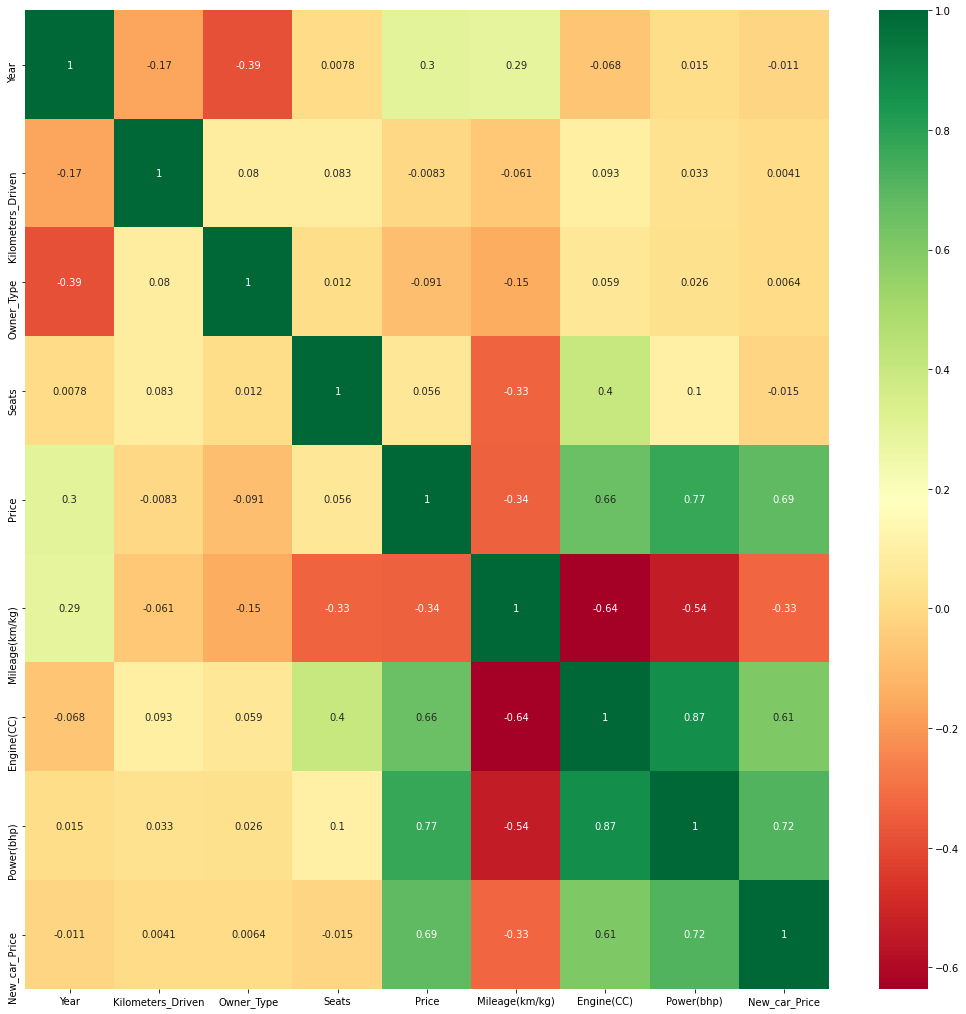

In [96]:
plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn')

In [97]:
train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp),New_car_Price
0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,Maruti,26.60,998.0,58.16,NaN
1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,Hyundai,19.67,1582.0,126.20,NaN
2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,Honda,18.20,1199.0,88.70,8.61
3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,Maruti,20.77,1248.0,88.76,NaN
4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,Audi,15.20,1968.0,140.80,NaN


In [98]:
final_test.dtypes


Year                     int64
Kilometers_Driven        int64
Owner_Type               int64
Seats                  float64
Mileage(km/kg)         float64
Engine(CC)             float64
Power(bhp)              object
Location_Bangalore       uint8
Location_Chennai         uint8
Location_Coimbatore      uint8
Location_Delhi           uint8
Location_Hyderabad       uint8
Location_Jaipur          uint8
Location_Kochi           uint8
Location_Kolkata         uint8
Location_Mumbai          uint8
Location_Pune            uint8
Fuel_Type_Diesel         uint8
Fuel_Type_LPG            uint8
Fuel_Type_Petrol         uint8
Transmission_Manual      uint8
dtype: object

In [99]:
final_test.shape

(1223, 21)

In [100]:
final_train.drop('Location',axis=1,inplace=True)

In [101]:
final_train.dtypes

Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type             int64
Seats                float64
Price                float64
Company               object
Mileage(km/kg)       float64
Engine(CC)           float64
Power(bhp)           float64
New_car_Price        float64
Bangalore              uint8
Chennai                uint8
Coimbatore             uint8
Delhi                  uint8
Hyderabad              uint8
Jaipur                 uint8
Kochi                  uint8
Kolkata                uint8
Mumbai                 uint8
Pune                   uint8
Diesel                 uint8
LPG                    uint8
Petrol                 uint8
Manual                 uint8
dtype: object

In [102]:
final_train.drop('Transmission',axis=1,inplace=True)

In [103]:
def fuel_type(fuel):
    if fuel == 'Diesel':
        return 1
    if fuel == 'Petrol':
        return 2
    if fuel == 'CNG':
        return 3

In [104]:
final_train['Fuel_Type']=final_train['Fuel_Type'].apply(fuel_type)

In [105]:
final_train['Fuel_Type'].value_counts()

1    443
2    371
3      9
Name: Fuel_Type, dtype: int64

In [106]:
# final_train.isnull().sum()
final_train.drop('Company',axis=1,inplace=True)

In [107]:
X=final_train.drop('Price',axis=1)
y=final_train['Price']

### Train Test Split

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Model building and training

#### TreesRegressor 

In [109]:
from sklearn.ensemble import ExtraTreesRegressor 

In [110]:
selection= ExtraTreesRegressor()

In [111]:
selection.fit(X_train,y_train)

ExtraTreesRegressor()

In [112]:
predictions=selection.predict(X_test)

In [113]:
from sklearn.metrics import classification_report

In [114]:
selection.score(X_test,predictions)

1.0

In [115]:
selection.score(X_train,y_train)

1.0

In [116]:
pred=pd.DataFrame(predictions)

In [117]:
# pred['y_test']=pd.DataFrame(y_test)

In [118]:
y_df= pd.DataFrame(y_test)
y_df['predictions']=pd.DataFrame(predictions)

In [119]:
y_test[:10], #print(predictions)

(1680     8.20
 5630     6.94
 2283    28.90
 1453     5.80
 2013    19.05
 1300    67.00
 4374     3.40
 1948     7.12
 3464    22.20
 3459    12.00
 Name: Price, dtype: float64,)

In [132]:
# selection.predict(y_test)

#### Model Evaluation

In [134]:
print("model Accuracy is :",selection.score(X_test,y_test))

model Accuracy is : 0.8626839167083168


#### Linear Regression

In [135]:
from sklearn.linear_model import LinearRegression

In [137]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [139]:
predict_lr=model.predict(X_test)

#### Model Eavaluation

In [143]:
print('Model Accuracy is for Linear Regression',model.score(X_test, y_test))

Model Accuracy is for Linear Regression 0.7684896833069009
